# Nevrale nettverk

In [6]:
import torch

Nevrale nettverk har vanligvis komplekse strukturer. Likevel består de av flere isolerte komponenter, og disse finner man i `torch.nn`. 

De fleste komponentene blir et såkalt _lag_ i nettverket, mens andre komponenter anvendes på eksisterende lag (feks aktiveringsfunksjoner). 

Den enkleste er `torch.nn.Linear`, og setter opp et lineært lag. Matematisk gjør den en lineær transformasjon fra et vektorrom til et annet. Feks kan den ta inn en vektor med 5 features, og outputte en vektor med 3 features:

<img src="../res/nn_5in_3out-cropped.svg" width="500px" height="auto" alt="SVG Image"  style="filter: invert(100%); "/>

In [7]:
import torch.nn as nn
layer = nn.Linear(in_features=5, out_features=3) # Construct layer
layer

Linear(in_features=5, out_features=3, bias=True)

In [8]:
data = torch.Tensor([[1, 2, 3, 4, 5]])
print(f"Input vector: {data}")
output = layer(data) # Feed data into layer
print(f"Output vector: {output}")

Input vector: tensor([[1., 2., 3., 4., 5.]])
Output vector: tensor([[-0.0637,  0.8910,  1.9114]], grad_fn=<AddmmBackward0>)


In [9]:
print(layer.weight)
print(f"Weight shape: {layer.weight.shape}\n")

print(layer.bias)
print(f"Bias shape: {layer.bias.shape}")

Parameter containing:
tensor([[ 0.2193, -0.2386,  0.1228,  0.0032,  0.0351],
        [ 0.3040, -0.3064,  0.3555,  0.0979, -0.1217],
        [-0.0745,  0.1722,  0.3045,  0.0684,  0.0322]], requires_grad=True)
Weight shape: torch.Size([3, 5])

Parameter containing:
tensor([-0.3626,  0.3500,  0.2935], requires_grad=True)
Bias shape: torch.Size([3])


Når man sender input-vektoren inn skjer følgende operasjon (hvor `@` er matrisemultiplikasjon):

In [10]:
data @ layer.weight.T + layer.bias

tensor([[-0.0637,  0.8910,  1.9114]], grad_fn=<AddBackward0>)

Vi ser fra resultatet over at det stemmer .


Vektene og biaset utgjør til sammen **parametrene** for dette lineære laget, og er verdiene som endres under trening. Hvordan disse er strukturert og brukes varierer for andre typer lag. Konvolusjonelle lag bruker en "sliding window"-mekanisme hvor de samme vektene multipliseres med forskjellige deler av et bilde. Da brukes vanligvis et mindre antall parametre. Til denne introduksjon holder vi oss derimot til lineære lag. 

### Aktiveringsfunksjoner

Det lineære laget utfører en lineær operasjon. Fleksibiliteten av nevrale nettverk kommer derimot av såkalte _aktiveringsfunksjoner_ som utfører ikke-lineære operasjoner på data. Disse inneholder **vanligvis ikke** trenbare parametre. De enkleste opererer på hvert element individuelt, som feks Tanh. Vi ser på et en-dimensjonalt-case for å visualisere det enkelt.

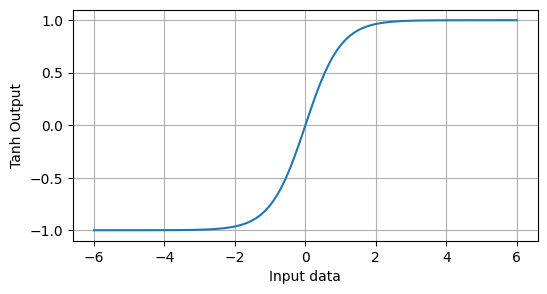

In [11]:
import matplotlib.pyplot as plt # Library for visualization
tanh = nn.Tanh()
assert not hasattr(tanh, "weight") # No learnable weights

data = torch.linspace(start=-6, end=6, steps=100) # One-dimensional vector with 100 elements 
output = tanh(data)

fig, ax = plt.subplots(figsize=(6, 3))

ax.plot(data, output)
ax.set_xlabel("Input data")
ax.set_ylabel("Tanh Output")

# Add a grid
ax.grid(True)

Et viktig poeng er at aktiveringsfunksjoner ikke modifiserer _shapen_ til tensoren. Dette kan demonstreres på en tensor med flere shape-dimensjoner. 

In [ ]:
data = torch.rand(30, 5, 15)
print(f"shape before activation function: {data.shape}")
data = tanh(data)
shape2 = print(f"shape after activation function: {data.shape}")

shape before activation function: torch.Size([30, 5, 15])
shape after activation function: torch.Size([30, 5, 15])


En annen viktig er `nn.Softmax`, og brukes til å transformere en vektor til elementer som summeres til 1. 

Dette gjør den litt annerledes enn Tanh, siden vi må spesifisere en av shape-dimensjonene som skal summeres til 1.

Passer fint som siste lag i et nettverk man ønsker skal modellere en sannsynlighetsfordeling (total sannsynlighet av alle utfallene av en stokastisk variabel skal være 1).

For denne anledningen tar vi også i bruk `nn.functional`, som er et delbibliotek som tilbyr mange av komponentene tilstandsfrie. 

In [12]:
import torch.nn.functional as F

# data = torch.Tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
data = torch.randn(3, 3)
print(f"Original data:\n{data}")
data = F.softmax(data, dim=1)
print(f"Transformed data:\n{data}")
print(f"Summing individual batch elements:\n{data.sum(dim=1)}")

Original data:
tensor([[-1.5677, -0.5205,  0.0926],
        [-0.0336, -0.3715,  0.7790],
        [-0.9349, -2.6775,  0.1262]])
Transformed data:
tensor([[0.1098, 0.3128, 0.5775],
        [0.2521, 0.1798, 0.5681],
        [0.2460, 0.0431, 0.7109]])
Summing individual batch elements:
tensor([1., 1., 1.])
